# Authors: 
**Alejandro C Parra** https://github.com/athanatos96


**Atreish Ramlakhan** https://github.com/atreish

**Ruslan Gokhman** https://github.com/Gokhman07

# 10. Regular Expression Matching


Given an input string s and a pattern p, implement regular expression matching with support for '.' and '*' where:

'.' Matches any single character.​​​​
'*' Matches zero or more of the preceding element.
The matching should cover the entire input string (not partial).

In [4]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        new_p = ""
        leng = len(p)
        for i in range(leng):
            if p[i] == "*" and i > 0:
                prev = p[i-1]
                if prev in s or prev==".":
                    new_p += p[i]
                else:
                    new_p = new_p[:-1]
            else:
                new_p += p[i]
        #print(new_p)

        ss = set(s)
        for i in range( len(new_p)):
            if i < len(new_p)-1 and new_p[i+1]=="*":
                continue
            elif new_p[i]=="*" or new_p[i]==".":
                continue
            else:
                if new_p[i] not in ss:
                    print("Fast False")
                    return False
        if "." not in new_p:
            for i in range (len(s)):
                if s[i] not in new_p:
                    return False


        def pattern_empty(pattern):
            #print(f"pattern_empty: {pattern}")
            leng = len(pattern)
            if leng==0:
                return True
            if leng==1:
                return False
            if pattern[1]=="*":
                return pattern_empty(pattern[2:])
            else:
                return False


        def mat(st, pa):
            #print(f"st: {st} | pa: {pa}")
            if st =="" and pattern_empty(pa):
                #print("Both Empty")
                return True
            elif st != "" and pa == "":
                #print(f"PA Empty. S: {st} | P: {pa}")
                return False
            elif st == "" and not pattern_empty(pa):
                #print(f"ST Empty. S: {st} | P: {pa}")
                return False

            string_char = st[0]
            pattern_char = pa[0]

            if len(pa) > 1:
                asterisk = pa[1] == "*"
            else:
                asterisk = False

            if pattern_char == "." or string_char == pattern_char:
                if asterisk:
                    res = mat(st[1:], pa[2:]) or mat(st, pa[2:]) or mat(st[1:], pa) 
                else:
                    res = mat(st[1:], pa[1:])
                return res
            else:
                if asterisk:
                    return mat(st, pa[2:])
                else:
                    return False

        return mat(s, new_p)

In [6]:
solver = Solution

s = "aa"
p = "a"
print(f"S: {s}, P: {p}, is a Match: {solver.isMatch(solver, s, p)}")

s = "aa"
p = "a*"
print(f"S: {s}, P: {p}, is a Match: {solver.isMatch(solver, s, p)}")

s = "ab"
p = ".*"
print(f"S: {s}, P: {p}, is a Match: {solver.isMatch(solver, s, p)}")

S: aa, P: a, is a Match: False
S: aa, P: a*, is a Match: True
S: ab, P: .*, is a Match: True


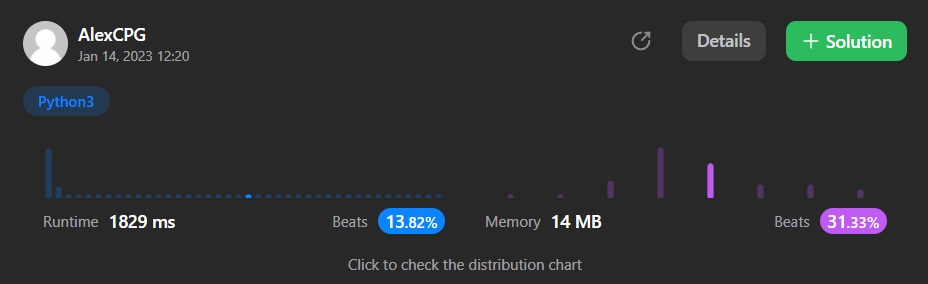